In [1]:
import pandas as pd
import sqlite3
import os
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/awinecoff/Documents/muscularity


In [3]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn


def select_from_table(conn, table):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    sql_str = "SELECT * FROM {tb}".format(tb=table)
    cur = conn.cursor()
    cur.execute(sql_str)
    names = [description[0] for description in cur.description]

    rows = cur.fetchall()
    
    df = pd.DataFrame(rows, columns =names) 
   
    return df

In [4]:
#conn.close()

In [5]:
data_path = '/Users/awinecoff/Documents/muscularity/data'
os.chdir(data_path)

conn = create_connection('muscularity_sqlite.db')
ht_wt_bmi = select_from_table(conn, 'ht_wt_bmi')
body_decisions = select_from_table(conn, 'body_decisions')
body_image_values = select_from_table(conn, 'body_image_values')
demographics = select_from_table(conn, 'demographics')

conn.close()

In [6]:
demographics.columns

Index(['subj', 'sport', 'gender', 'orientation', 'age', 'education', 'race',
       'duration', 'frequency', 'percent women', 'current', 'ideal', 'diff',
       'thinness', 'tone', 'size'],
      dtype='object')

In [7]:
demographics = demographics[['subj', 'sport', 'gender', 'age', 'education', 'race', 'frequency', 'duration', 'percent women']]
demographics_plus = pd.merge(demographics, ht_wt_bmi, on='subj', how='left').dropna()
demographics_plus['BMI'] = pd.to_numeric(demographics_plus['BMI'],errors='coerce').round(1)#round BMI so it can be more easily plotted later
demographics_plus = demographics_plus[(demographics_plus['BMI'] > 14) & (demographics_plus['BMI'] < 35)]#remove implausible BMI values
demographics_plus.sort_values('BMI', ascending=True)

,subj,sport,gender,age,education,race,frequency,duration,percent women,ht_in,wt_lb,BMI
848,1112,Rock climbing,Female,53.0,18,Asian,Three days a week,1-3 years,Less than 25%,64.0,95,16.3
125,1023,Rock climbing,Female,24.0,17,"White, Caucasian",Three days a week,10 or more years,Less than 25%,70.0,115,16.5
550,1050,Rock climbing,Female,33.0,16,"White, Caucasian",Three days a week,10 or more years,About 75%,64.0,97,16.6
14,4110,Rock climbing,Male,19.0,12,"White, Caucasian",Five days a week,7-9 years,About 50%,71.5,123,16.9
506,1072,Rock climbing,Female,32.0,20,"White, Caucasian",Five days a week,10 or more years,Less than 25%,72.0,126,17.1
835,1133,Rock climbing,Female,51.0,16,Asian,Two days a week,10 or more years,About 25%,64.0,100,17.2
490,4116,Rock climbing,Male,31.0,16,"White, Caucasian",Three days a week,1-3 years,About 50%,70.0,120,17.2
250,3045,Running,Female,27.0,20,"White, Caucasian",Six days a week,7-9 years,About 25%,67.0,110,17.2
729,1104,Rock climbing,Female,40.0,16,"White, Caucasian",Three days a week,7-9 years,About 50%,69.0,117,17.3
427,2027,CrossFit,Female,30.0,16,"White, Caucasian",Three days a week,1-3 years,About 50%,58.0,83,17.3


In [8]:
body_decisions_long=pd.melt(body_decisions,id_vars=['subj'],var_name='body_num', value_name='choice').sort_values(['subj'])
body_decisions_long.head(5)

body_image_values.head(5)

,body_num,detail,emaciation,size,test_jpg,ref_side
0,body1,0.0,0.25,0.00,1_BBD0_BBS0_E0.25.jpg,Left
1,body2,0.0,0.50,0.00,2_BBD0_BBS0_E0.5.jpg,Right
2,body3,0.0,0.75,0.00,3_BBD0_BBS0_E0.75.jpg,Left
3,body4,0.0,0.00,0.25,5_BBD0_BBS0.25_E0.jpg,Left
4,body5,0.0,0.25,0.25,6_BBD0_BBS0.25_E0.25.jpg,Right


In [9]:
body_choice_df = pd.merge(body_decisions_long, body_image_values, on='body_num', how='left')
body_choice_df = pd.merge(body_choice_df, demographics, on='subj',how='left')
body_choice_df.head(5)


,subj,body_num,choice,detail,emaciation,size,test_jpg,ref_side,sport,gender,age,education,race,frequency,duration,percent women
0,1000,body36,Right,0.50,0.00,0.25,55_BBD0.5_BBS0.25_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",Three days a week,7-9 years,About 25%
1,1000,body20,Right,0.25,0.00,0.25,30_BBD0.25_BBS0.25_E0.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",Three days a week,7-9 years,About 25%
2,1000,body54,Left,0.75,0.50,0.25,82_BBD0.75_BBS0.25_E0.5.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",Three days a week,7-9 years,About 25%
3,1000,body12,Right,0.00,0.00,0.75,15_BBD0_BBS0.75_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",Three days a week,7-9 years,About 25%
4,1000,body29,Right,0.25,0.25,0.75,41_BBD0.25_BBS0.75_E0.25.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",Three days a week,7-9 years,About 25%


In [10]:
body_choice_df.loc[:,'chose_ref'] = [1 if x == y else 0 for x,y in zip(body_choice_df['ref_side'], body_choice_df['choice'])] 
body_choice_df.loc[:,'chose_test'] = [1 if x != y else 0 for x,y in zip(body_choice_df['ref_side'], body_choice_df['choice'])] 

body_choice_df.dtypes

subj               int64
body_num          object
choice            object
detail           float64
emaciation       float64
size             float64
test_jpg          object
ref_side          object
sport             object
gender            object
age              float64
education          int64
race              object
frequency         object
duration          object
percent women     object
chose_ref          int64
chose_test         int64
dtype: object

In [11]:
def plot_hist_by_sport(df, continuous_var, bins):
    df = df.dropna()
    
    run = list(df[df['sport'] == 'Running'][continuous_var])
    rc = list(df[df['sport'] == 'Rock climbing'][continuous_var])
    cf = list(df[df['sport'] == 'CrossFit'][continuous_var])

    # Assign colors for each airline and the names
    colors = ['#A0AF84', '#634563', '#FC7358']
    names = ['Running', 'Rock Climbing', 'CrossFit']

    # Make the histogram using a list of lists
    # Normalize the flights and assign colors and names
    plt.hist([run, rc, cf], bins = bins,
             color = colors, label=names)

    # Plot formatting
    #plt.figure(figsize=(20,10))
    plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
    plt.legend()
    plt.xlabel(continuous_var.capitalize())
    plt.ylabel('Count')
    plt.title('Distribution of {cv} by Sport'.format(cv=continuous_var.capitalize()))


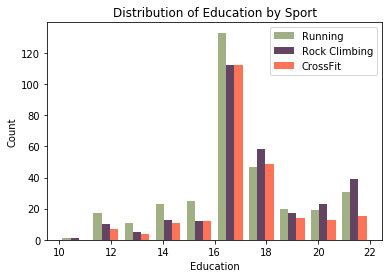

In [12]:
plot_hist_by_sport(demographics_plus, 'education', 10)

In [ ]:
def extract_level_df(df, categorial_var):

    level_list = []
    for c in df.columns:
        if att in c:
            level_list.append(c)

    level_df = df[level_list]

    return level_df


In [13]:
race_by_sport = demographics_plus[['subj', 'sport','race']].groupby(['sport','race']).count().reset_index()
race_by_sport

,sport,race,subj
0,CrossFit,"American Indian, Aleutian, or Eskimo",1
1,CrossFit,Asian,22
2,CrossFit,"Black, African American",3
3,CrossFit,"Native Hawaiian, Other Pacific Islander",2
4,CrossFit,Other,13
5,CrossFit,"White, Caucasian",196
6,Rock climbing,Asian,26
7,Rock climbing,"Black, African American",2
8,Rock climbing,Other,15
9,Rock climbing,"White, Caucasian",247


In [14]:
#race_by_sport[(race_by_sport['sport']=='Running') & (race_by_sport['race']=='Asian')]
sport_df = race_by_sport[race_by_sport['sport']=='CrossFit']

In [16]:
def make_sport_pie_chart(df, sport, categorical_var):
    race_by_sport = df[['subj', 'sport',categorical_var]].groupby(['sport',categorical_var]).count().reset_index()

    sport_df = race_by_sport[race_by_sport['sport']==sport]
    
    x=sport_df[categorical_var]
    y=sport_df['subj']

    colors = ["#7d2841","#514626","#007469",
    "#629957",
    "#cf9ead",
    "#a0a252",
    ]
    percent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
    labels = ['{0} ({1:1.1f}%)'.format(i,j) for i,j in zip(x, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, bbox_to_anchor=(0.1, 1.02, 1., .102), loc='lower left',
               ncol=2, mode="expand", borderaxespad=0., prop={'size': 12}, frameon=False)

    # View the plot
    plt.tight_layout()
    plt.show()
    #plt.savefig('piechart.png', bbox_inches='tight')

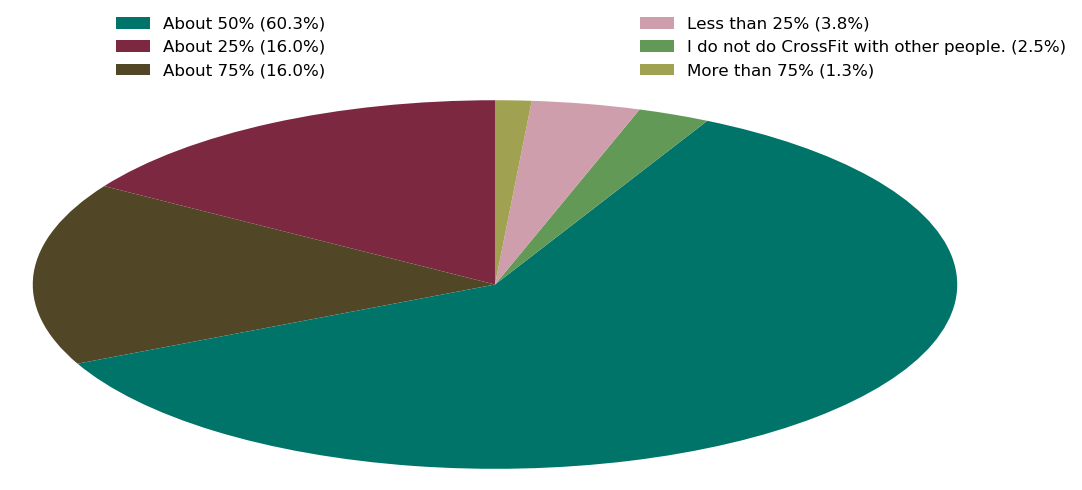

In [21]:
make_sport_pie_chart(demographics_plus, 'CrossFit', 'percent women')

In [ ]:

model_data_all = body_choice_df.dropna()
model_data_all.head(5)


In [ ]:
print("Length of df for all is {}".format(len(model_data_all)))
model_data_female = model_data_all[model_data_all['gender']=='Female']
model_data_male = model_data_all[model_data_all['gender']=='Male']

#Use running as the reference group
female_mod_run =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='Running'))*size + C(sport, Treatment(reference='Running'))*detail + C(sport, Treatment(reference='Running'))*emaciation + C(sport, Treatment(reference='Running'))*age", data = model_data_female)
male_mod_run =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='Running'))*size + C(sport, Treatment(reference='Running'))*detail + C(sport, Treatment(reference='Running'))*emaciation + C(sport, Treatment(reference='Running'))*age", data = model_data_male)



f_result_run = female_mod_run.fit()
m_result_run = male_mod_run.fit()




In [ ]:
print (f_result_run.summary())

In [ ]:
female_mod_rc =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='Rock climbing'))*size + C(sport, Treatment(reference='Rock climbing'))*detail + C(sport, Treatment(reference='Rock climbing'))*emaciation + C(sport, Treatment(reference='Rock climbing'))*age", data = model_data_female)
male_mod_rc =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='Rock climbing'))*size + C(sport, Treatment(reference='Rock climbing'))*detail + C(sport, Treatment(reference='Rock climbing'))*emaciation + C(sport, Treatment(reference='Rock climbing'))*age", data = model_data_male)

female_mod_cf =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='CrossFit'))*size + C(sport, Treatment(reference='CrossFit'))*detail + C(sport, Treatment(reference='CrossFit'))*emaciation + C(sport, Treatment(reference='CrossFit'))*age", data = model_data_female)
male_mod_cf =smf.logit(formula = "chose_test ~ C(sport, Treatment(reference='CrossFit'))*size + C(sport, Treatment(reference='CrossFit'))*detail + C(sport, Treatment(reference='CrossFit'))*emaciation + C(sport, Treatment(reference='CrossFit'))*age", data = model_data_male)

f_result_rc = female_mod_rc.fit()
m_result_rc = male_mod_rc.fit()

f_result_run = female_mod_cf.fit()
m_result_run = male_mod_cf.fit()

In [ ]:
print (f_result_rc.summary())